In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
raw_data = sc.read("../data/Tosches_turtle.h5ad", index_col=0)

In [3]:
processed_data = np.nan_to_num(raw_data.X, nan=0.0)
raw_data.X = processed_data
label = raw_data.obs['celltype']

In [4]:
print(processed_data.shape) # (n_cells, n_genes)

(18664, 23500)


In [5]:
print(raw_data.X)

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 40204097 stored elements and shape (18664, 23500)>
  Coords	Values
  (0, 5)	4.0
  (0, 8)	2.0
  (0, 9)	2.0
  (0, 10)	1.0
  (0, 13)	1.0
  (0, 14)	3.0
  (0, 16)	4.0
  (0, 17)	2.0
  (0, 19)	2.0
  (0, 21)	1.0
  (0, 22)	1.0
  (0, 23)	1.0
  (0, 29)	2.0
  (0, 34)	1.0
  (0, 44)	1.0
  (0, 45)	1.0
  (0, 47)	1.0
  (0, 48)	3.0
  (0, 59)	1.0
  (0, 61)	1.0
  (0, 64)	1.0
  (0, 74)	1.0
  (0, 75)	1.0
  (0, 77)	6.0
  (0, 79)	2.0
  :	:
  (18663, 22927)	1.0
  (18663, 22928)	2.0
  (18663, 22955)	1.0
  (18663, 22964)	1.0
  (18663, 22983)	1.0
  (18663, 23033)	1.0
  (18663, 23152)	1.0
  (18663, 23156)	2.0
  (18663, 23157)	1.0
  (18663, 23170)	2.0
  (18663, 23185)	1.0
  (18663, 23187)	2.0
  (18663, 23191)	2.0
  (18663, 23192)	8.0
  (18663, 23193)	1.0
  (18663, 23253)	1.0
  (18663, 23276)	1.0
  (18663, 23289)	1.0
  (18663, 23302)	1.0
  (18663, 23339)	1.0
  (18663, 23360)	1.0
  (18663, 23363)	1.0
  (18663, 23404)	1.0
  (18663, 23480)	2.0
  (18663, 2349

In [6]:
print(raw_data.obs.columns)

Index(['cell_ontology_class', 'cell_ontology_id', 'cell_type1', 'dataset_name',
       'donor', 'gender', 'organ', 'organism', 'platform', 'region', 'sample',
       'celltype'],
      dtype='object')


In [7]:
print(raw_data.var)

Empty DataFrame
Columns: []
Index: [A1CF, A2ML1, A4GALT, A4GNT, AAAS, AACS, AADAT, AAED1, AAGAB, AAK1, AAMDC, AAMP, AANAT, AAR2, AARS, AARS2, AARSD1, AASDH, AASDHPPT, AASS, AATF, AATK, ABAT, ABCA1, ABCA12, ABCA13, ABCA2, ABCA3, ABCA4, ABCA7, ABCB10, ABCB11, ABCB5, ABCB7, ABCB8, ABCB9, ABCC10, ABCC2, ABCC3, ABCC4, ABCC5, ABCC8, ABCC9, ABCD1, ABCD2, ABCD3, ABCD4, ABCE1, ABCF1, ABCF2, ABCF3, ABCG1, ABCG2, ABCG4, ABCG5, ABCG8, ABHD1, ABHD10, ABHD11, ABHD12, ABHD12B, ABHD13, ABHD14A, ABHD14B, ABHD15, ABHD16A, ABHD16B, ABHD17A, ABHD17B, ABHD17C, ABHD2, ABHD3, ABHD4, ABHD5, ABHD6, ABHD8, ABI1, ABI2, ABI3, ABI3BP, ABL1, ABL2, ABLIM1, ABLIM2, ABLIM3, ABR, ABRA, ABRACL, ABT1, ABTB1, ABTB2, ACAA1, ACAA2, ACACA, ACACB, ACAD10, ACAD11, ACAD8, ACAD9, ACADL, ...]

[23500 rows x 0 columns]


In [ ]:
print(any(raw_data.var_names.str.startswith('MT'))) # 线粒体基因
print(any(raw_data.var_names.str.startswith('RPS'))) # 核糖体蛋白 S 基因
print(any(raw_data.var_names.str.startswith('RPL'))) # 核糖体蛋白 L 基因

raw_data.var['mt'] = raw_data.var_names.str.startswith('MT')
raw_data.var['ribo'] = raw_data.var_names.str.startswith(('RPS', 'RPL'))

True
True
True


In [9]:
sc.pp.calculate_qc_metrics(raw_data, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

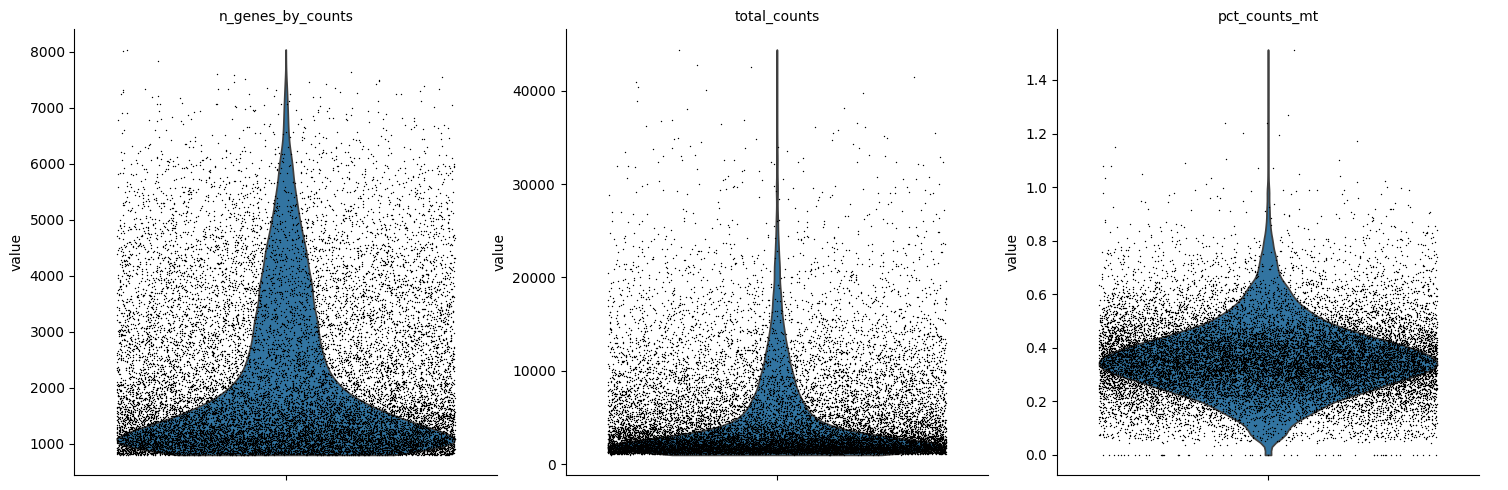

In [16]:
sc.pl.violin(raw_data, ["n_genes_by_counts", "total_counts", "pct_counts_mt"], jitter=0.4, multi_panel=True, save=True)

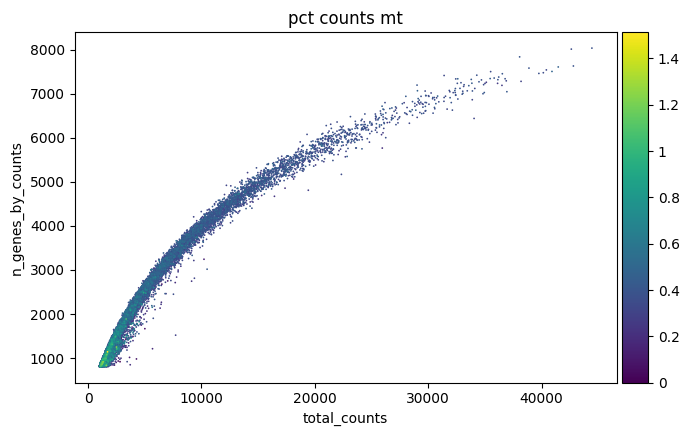

In [11]:
sc.pl.scatter(raw_data, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [12]:
sc.pp.filter_cells(raw_data, min_counts=500)
sc.pp.filter_genes(raw_data, min_cells=5)

In [13]:
# Normalization and log transformation
raw_data.layers["counts"] = raw_data.X.copy() # 保存原始数据

sc.pp.normalize_total(raw_data)
sc.pp.log1p(raw_data)